# Exercício 1 - Manipulações Básicas para comparação de bibliotecas

Este notebook é destinado ao exercçio das técnicas fundamentais de manipulação de imagem. 

As imagens foram adaptadas do dataset  PASCAL Visual Object Classes Challenge (VOC2007) disponível em http://host.robots.ox.ac.uk/pascal/VOC/voc2007/.

Elas foram armazenadas em uma hierarquia de pastas em que cada subpasta representa um tipo de objeto. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
%matplotlib inline

In [4]:
src_folder = "data/voc"

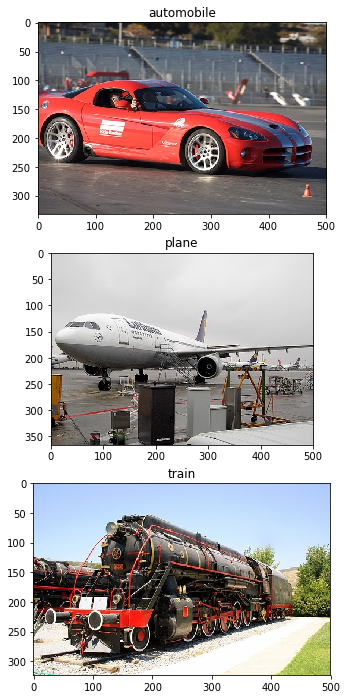

In [5]:
fig = plt.figure(figsize=(12, 12))
for root, folders, filenames in os.walk(src_folder):
    image_num = 0
    num_folders = len(folders)
    for folder in sorted(folders):
        # Keep an incrementing count of each image
        image_num +=1
        # Find the first image file in the folder
        file_name = os.listdir(os.path.join(root,folder))[0]
        # Get the full path from the root folder
        file_path = os.path.join(root,folder, file_name)
        # Open the file using the matplotlib.image library
        image = mp_image.imread(file_path)
        # Add the image to the figure (which will have a row for each folder, each containing one column for the image)
        a=fig.add_subplot(num_folders, 1, image_num)
        # Add the image to the plot
        image_plot = plt.imshow(image)
        # Add a caption with the folder name
        a.set_title(folder)
        
# Show the plot
plt.show()

## Comparando bibliotecas

In [11]:
from PIL import Image
import skimage as sk
from skimage import io as sk_io
import cv2

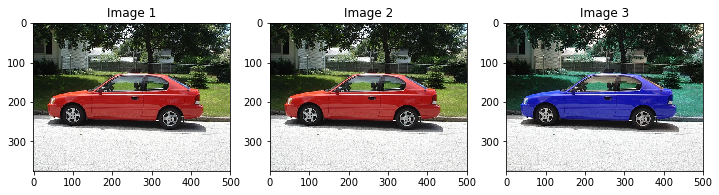

In [15]:
images = []

pil_image = Image.open(os.path.join(src_folder, "automobile", "000522.jpg"))
images.append(pil_image)
sk_image = sk_io.imread(os.path.join(src_folder, "automobile", "000522.jpg"))
images.append(sk_image)
c = cv2.imread(os.path.join(src_folder, "automobile", "000522.jpg"))
images.append(cv_image)

# Set up a figure of an appropriate size
fig = plt.figure(figsize=(12, 12))

image_num = 0
num_images = len(images)
# loop through the images
for image_idx in range(num_images):
    # Keep an incrementing count of each image
    a=fig.add_subplot(1, num_images, image_idx+1)
    # Add the image to the plot
    image_plot = plt.imshow(images[image_idx])
    # Add a caption with the folder name
    a.set_title("Image " + str(image_idx+1))
        
# Show the plot
plt.show()

OpenCV carrega imagens em um formato diferente que as outras bibliotecas [ padrão BGR] , provocando uma alteração das cores. Para corrigir esse problema deve-se informar o padrão de cor utilizado com [RGB]

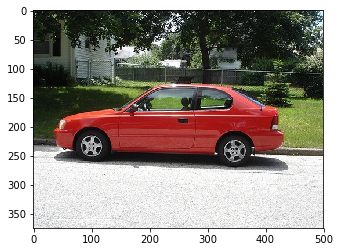

In [16]:
cv_image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.imshow(cv_image_rgb)

Em compensação, quando desejamos trabalhar com imagens em geral usamos a biblioteca Numpy, que representa numericamente a imagem como uma matriz. Se considerarmos as imagens geradas por cada biblioteca(PIL, OpenCV e Scikit-Image), temos que a PIL náo nos fornece um numpy array, sendo necessário realizar sua conversão. 

numpy.ndarray

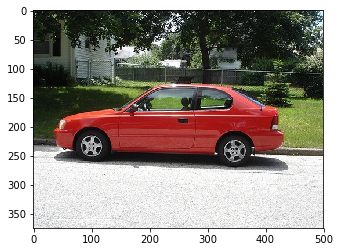

In [17]:
pil_array = np.array(pil_image)
plt.imshow(pil_array)
type(pil_array)

PIL.Image.Image

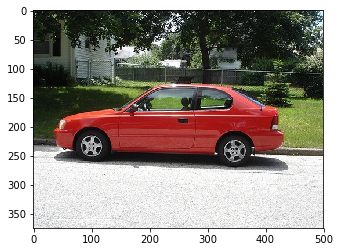

In [18]:
#Para converter de numpy para PIL
pil_sk_image = Image.fromarray(sk_image)
plt.imshow(pil_sk_image)
type(pil_sk_image)

### Convertendo para escala de cinza

(375, 500)

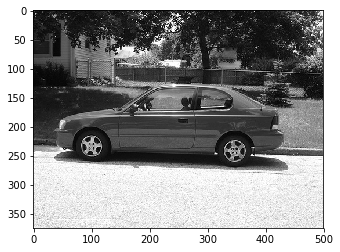

In [19]:
#convertendo a imagem SCIKIT para escala de cinza
sk_gray_image = sk.color.rgb2gray(sk_image)
plt.imshow(sk_gray_image, 'gray')
sk_gray_image.shape

In [ ]:
#convertendo a imagem PIL para escala de cinza


In [ ]:
#convertendo a imagem OPENCV para escala de cinza


## Manipulando imagens

### Rotate

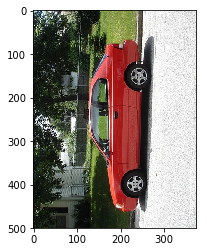

In [20]:
## Rotação da imagem com PIL
rotated_pil_image = pil_image.rotate(90, expand=1)
plt.imshow(rotated_pil_image)

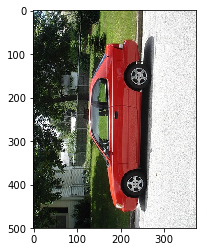

In [21]:
##  Rotação da imagem com SCIKIT-IMAGE 
from skimage import transform as sk_transform
rotated_sk_image = sk_transform.rotate(sk_image, 90, resize=True)
plt.imshow(rotated_sk_image)

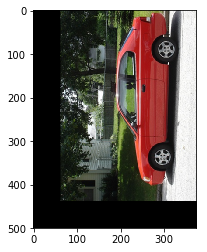

In [36]:
## Rotação da imagem com OPENCV
import numpy as np

def rotateImage(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, (image.shape[:-1]))
  return result

plt.imshow(rotateImage(cv_image_rgb, 90))

### FLIP

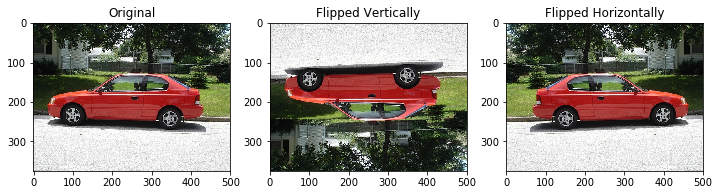

In [41]:
#Flip with PIL
def flip_image(image, flip):
    return image.transpose(flip)

pil_image_vertically=flip_image(pil_image,Image.FLIP_TOP_BOTTOM )
pil_image_horizontally=flip_image(pil_image, Image.FLIP_LEFT_RIGHT)

fig = plt.figure(figsize=(12, 12))

# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(pil_image)
a.set_title("Original")

# Plot upended image
a=fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(pil_image_vertically)
a.set_title("Flipped Vertically")

# Plot mirrored image
a=fig.add_subplot(1, 3, 3)
image_plot_3 = plt.imshow(pil_image_horizontally)
a.set_title("Flipped Horizontally")

plt.show()

In [ ]:
## Flip with sckit


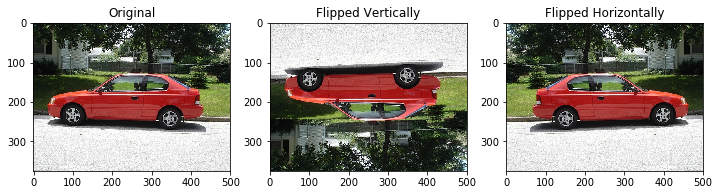

In [22]:
## Flip com OPENCV
import numpy as np
upended_cv_image_rgb = np.flip(cv_image_rgb, axis=0)
mirrored_cv_image_rgb = np.flip(cv_image_rgb, axis=1)

fig = plt.figure(figsize=(12, 12))

# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(cv_image_rgb)
a.set_title("Original")

# Plot upended image
a=fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(upended_cv_image_rgb)
a.set_title("Flipped Vertically")

# Plot mirrored image
a=fig.add_subplot(1, 3, 3)
image_plot_3 = plt.imshow(mirrored_cv_image_rgb)
a.set_title("Flipped Horizontally")

plt.show()

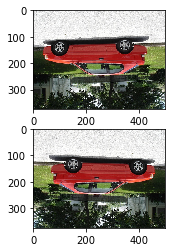

In [48]:
#usando o matplotlib e numpy 
import matplotlib.pyplot as plt
import numpy as np

im = np.flipud(sk_image)
plt.subplot(2, 1, 1)
plt.imshow(im)
plt.subplot(2, 1, 2)
plt.imshow(np.fliplr(im))
plt.show()

## Resizing

Original size: 500 x 375
New size: 150 x 112


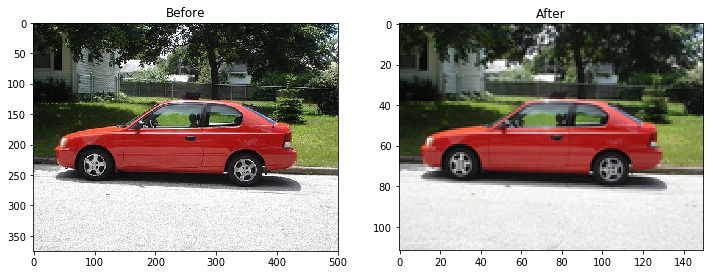

In [23]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline


# Get the PIL image size
o_h, o_w = pil_image.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 150 pixels on its widest dimensions
target_size = (150,150)
resized_img = pil_image.copy()
resized_img.thumbnail(target_size, Image.ANTIALIAS)
n_h, n_w = resized_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(pil_image)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(resized_img)
a.set_title('After')

plt.show()

Original size: 500 x 375
New size: 150 x 150


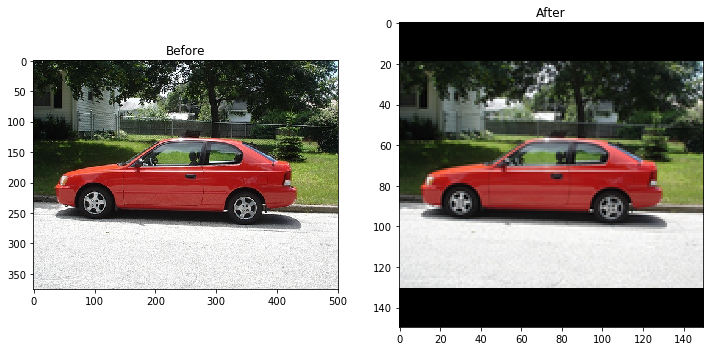

In [24]:
def resize_image(src_image, size=(200,200), bg_color="white"): 
    from PIL import Image, ImageOps 
    
    # resize the image so the longest dimension matches our target size
    src_image.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new square background image
    new_image = Image.new("RGB", size, bg_color)
    
    # Paste the resized image into the center of the square background
    new_image.paste(src_image, (int((size[0] - src_image.size[0]) / 2), int((size[1] - src_image.size[1]) / 2)))
  
    # return the resized image
    return new_image


# Get the image size
o_h, o_w = pil_image.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 150 x 150 with black padding
target_size = (150,150)
pad_color = "black"
resized_img = resize_image(pil_image.copy(), target_size, pad_color)
n_h, n_w = resized_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(pil_image)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(resized_img)
a.set_title('After')

plt.show()